In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [6]:
# set parameters
sigma = 1
mu = 0


# set proposal distribution functions
log_proposal = lambda mu, x: np.log(norm(mu, sigma).pdf(x))

# set proposal and target distribution functions
log_target = lambda mu, x: np.log(norm(mu, sigma).pdf(x))

# log_target = lambda x, thetas: (N*x[0]+c-1)*np.log(x[1]) - N*np.log(gamma(x[0])) + (a-1)*np.log(x[0]) + \
# -d*x[1] - b*x[0] + np.sum([(x[0]-1)*np.log(theta) - x[1]*theta for theta in thetas])

In [ ]:
## codes adapted from lab4
#implementation of metropolis-hastings (one step)
def MH_sampler(current, sigma, thetas):

    # propose a sample from proposal distribution
    proposal = np.random.normal(current, sigma)

    U = np.random.uniform(0, 1)
    
    if U < np.min((1, np.exp(log_target(proposal, thetas) - log_proposal(current, proposal)
                      - log_target(current, thetas) + log_proposal(proposal, current)))):
        return proposal

    else:
        return current


In [131]:
mu0 = 100
mu1 = 1

target_sigma0 = 1
target_sigma1 = 2

# # target distribution
# f = lambda x: norm(mu, target_sigma).pdf(x)
# energy = lambda x: -np.log(f(x))

# target distribution
f = lambda x: norm(mu0, target_sigma0).pdf(x) + norm(mu1, target_sigma1).pdf(x)
energy = lambda x: -np.log(f(x))

In [132]:
## simulated annealing codes adapted from Lecture 11 slides

#initialization for simulated annealing
init_params = {'solution':10, 'min_length':1000, 'max_temp':30}
num_epochs=10000

#Proposal distribution: bivariate normal distribution
proposal = lambda x: np.random.normal(x, sigma)


#Simulated Annealing
def simulated_annealing(energy,proposal, init_params, epochs, temp):
    accumulator = []
    
    old_solution = init_params['solution']
    old_energy = energy(old_solution)
  
    accepted=0
    total=0

    
    for epoch in range(epochs):
        
        total += 1

        #propose new solution based on current solution
        new_solution = proposal(old_solution)
        
        #compute energy of new solution
        new_energy = energy(new_solution)

        #compute a probability for accpeting new solution
        alpha = min(1, np.exp((old_energy - new_energy) / temp))

        #if new solution is better, i.e. gives us lower energy, then accept
        #if new solution is not better, we flip a weighted coin and decide whether to accept
        if np.random.uniform() < alpha: 
            #update everything if new solution accepted
            accepted += 1
            accumulator.append([new_solution, new_energy])

            old_energy = new_energy
            old_solution = new_solution

        else:
            # Keep the old stuff if new solution not accepted
            accumulator.append([old_solution, old_energy])

    return np.array(accumulator), accepted * 1. / total

In [133]:
accumulator, ratio = simulated_annealing(energy, proposal, init_params, epochs=num_epochs, temp=1)

In [134]:
accumulator

array([[10.        , 11.73708571],
       [10.25145791, 12.31076989],
       [10.25145791, 12.31076989],
       ...,
       [ 2.3974133 ,  1.8561812 ],
       [ 2.21748572,  1.79736965],
       [ 2.01822522,  1.74168354]])

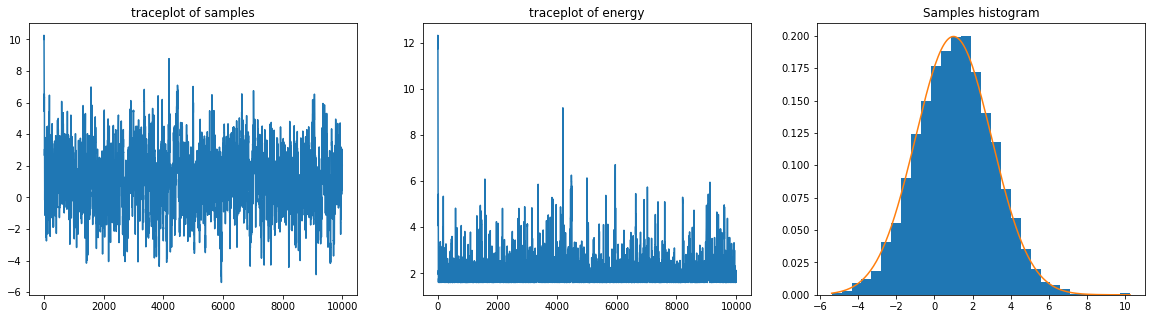

In [135]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(range(num_epochs), accumulator[:,0])
ax[0].set_title("traceplot of samples")
ax[1].plot(range(num_epochs), accumulator[:,1])
ax[1].set_title("traceplot of energy")
ax[2].hist(accumulator[:,0], bins=30,density=True)
xgrid = np.linspace(np.min(accumulator[:,0]),np.max(accumulator[:,0]),200)
ax[2].plot(xgrid, f(xgrid))
ax[2].set_title("Samples histogram")
plt.show()